<a href="https://colab.research.google.com/github/rafiafsan/Machine-Learning-Models/blob/main/ANN_on_Image_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files

In [2]:
uploaded = files.upload()

Saving archive (1).zip to archive (1).zip


In [26]:
import zipfile

# Unzip the dataset
with zipfile.ZipFile('archive (1).zip', 'r') as zip_ref:
    zip_ref.extractall('dataset')

In [30]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_dir = "/content/dataset/images/train"
test_dir = "/content/dataset/images/test"

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical'
)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [31]:
import numpy as np
X_train = []
y_train = []

for _ in range(len(train_generator)):
    imgs, labels = next(train_generator)
    X_train.extend(imgs)
    y_train.extend(labels)

X_train = np.array(X_train)
y_train = np.array(y_train)

In [33]:
X_train.shape

(28821, 64, 64, 3)

In [34]:
X_test = []
y_test = []
for _ in range(len(test_generator)):
    imgs, labels = next(test_generator)
    X_test.extend(imgs)
    y_test.extend(labels)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [37]:
y_test.shape

(7066, 7)

In [39]:
y_train_original = y_train.copy()
y_test_original = y_test.copy()

In [51]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten

model = Sequential()

model.add(Flatten(input_shape=(64, 64, 3)))

# Hidden Layer 1
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))


model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))


model.add(Dense(7, activation='softmax'))


In [52]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',  # Multi-class classification loss function
              metrics=['accuracy'])


In [53]:
history = model.fit(
    X_train, y_train,
    epochs=5,  # Epochs can be adjusted as needed
    batch_size=32,  # Batch size can be adjusted
    validation_data=(X_test, y_test)  # Validation data for evaluating after each epoch
)


Epoch 1/5
901/901 ━━━━━━━━━━━━━━━━━━━━ 37s 39ms/step - accuracy: 0.2244 - loss: 2.3804 - val_accuracy: 0.2583 - val_loss: 1.8121
Epoch 2/5
901/901 ━━━━━━━━━━━━━━━━━━━━ 32s 36ms/step - accuracy: 0.2439 - loss: 1.8231 - val_accuracy: 0.2583 - val_loss: 1.8096
Epoch 3/5
901/901 ━━━━━━━━━━━━━━━━━━━━ 33s 37ms/step - accuracy: 0.2496 - loss: 1.8181 - val_accuracy: 0.2583 - val_loss: 1.8095
Epoch 4/5
901/901 ━━━━━━━━━━━━━━━━━━━━ 43s 39ms/step - accuracy: 0.2486 - loss: 1.8150 - val_accuracy: 0.2583 - val_loss: 1.8090
Epoch 5/5
901/901 ━━━━━━━━━━━━━━━━━━━━ 36s 33ms/step - accuracy: 0.2502 - loss: 1.8154 - val_accuracy: 0.2583 - val_loss: 1.8091


In [43]:
# Evaluate the model on test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

# Predicting the class of a sample image
predictions = model.predict(X_test)


221/221 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.2540 - loss: 1.8105
Test Loss: 1.8100749254226685, Test Accuracy: 0.2585621178150177
221/221 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step


In [56]:
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 25.86


221/221 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.2538 - loss: 1.8089
Test Loss: 1.8091421127319336
Test Accuracy: 0.25827908515930176
221/221 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


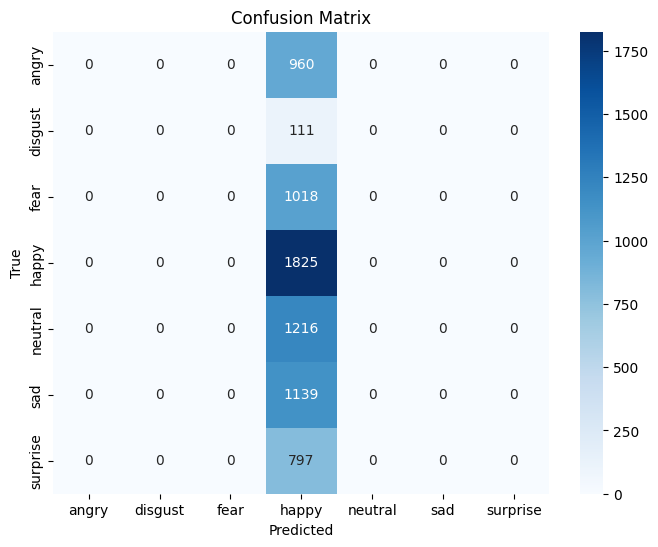

In [58]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)  # Convert one-hot encoded to labels
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=train_generator.class_indices, yticklabels=train_generator.class_indices)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
